In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import pandas as pd
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
X3 = pickle.load( open('X3.pkl', "rb" ) )
y = pickle.load( open('y.pkl', "rb" ) )

In [12]:
sample = pd.concat([X3,y], axis = 1)
sample

,Age,R,HR,RBI,SB,SO,GDP,IBB,2,3,...,6,7,8,9,SB2,HR2,R2,R_x_HR,SB_x_R,OBP
1,30.0,41.0,8.0,41.0,3.0,69.0,4.0,0.0,0,0,...,0,0,1,0,9.0,64.0,1681.0,328.0,123.0,0.310
2,25.0,118.0,20.0,93.0,27.0,113.0,13.0,8.0,0,0,...,0,1,0,0,729.0,400.0,13924.0,2360.0,3186.0,0.446
5,27.0,42.0,14.0,42.0,6.0,60.0,8.0,4.0,0,1,...,0,0,0,0,36.0,196.0,1764.0,588.0,252.0,0.363
8,28.0,17.0,0.0,15.0,4.0,38.0,1.0,0.0,0,0,...,1,0,0,0,16.0,0.0,289.0,0.0,68.0,0.309
10,25.0,123.0,27.0,108.0,9.0,85.0,14.0,2.0,0,0,...,0,0,0,0,81.0,729.0,15129.0,3321.0,1107.0,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,28.0,61.0,11.0,59.0,24.0,83.0,2.0,5.0,0,0,...,0,0,0,0,576.0,121.0,3721.0,671.0,1464.0,0.361
822,28.0,64.0,21.0,55.0,2.0,107.0,4.0,1.0,0,0,...,0,1,0,0,4.0,441.0,4096.0,1344.0,128.0,0.334
824,27.0,100.0,44.0,97.0,30.0,118.0,8.0,16.0,0,0,...,0,0,0,1,900.0,1936.0,10000.0,4400.0,3000.0,0.429
829,34.0,20.0,6.0,27.0,0.0,39.0,4.0,0.0,0,1,...,0,0,0,0,0.0,36.0,400.0,120.0,0.0,0.321


In [13]:
sample.corr()

,Age,R,HR,RBI,SB,SO,GDP,IBB,2,3,...,6,7,8,9,SB2,HR2,R2,R_x_HR,SB_x_R,OBP
Age,1.000000,-0.041595,-0.027252,-0.006767,-0.117218,-0.094907,0.043014,0.038009,0.004357,-0.003872,...,-0.020846,0.011048,-0.009964,0.012214,-0.088790,-0.025671,-0.050219,-0.036023,-0.102808,0.039441
R,-0.041595,1.000000,0.829341,0.910100,0.560570,0.804929,0.700304,0.515400,-0.035980,0.009003,...,0.008625,-0.016530,0.013585,0.005081,0.366382,0.696011,0.950101,0.828022,0.608969,0.600690
HR,-0.027252,0.829341,1.000000,0.920135,0.250970,0.790652,0.612678,0.579762,-0.028938,0.010432,...,-0.003385,-0.020823,0.015375,0.002144,0.103353,0.917710,0.812663,0.943059,0.328583,0.498845
RBI,-0.006767,0.910100,0.920135,1.000000,0.335554,0.809252,0.756900,0.572776,-0.026892,0.005149,...,0.009179,-0.021888,0.008832,0.003274,0.168057,0.787778,0.852178,0.866895,0.395888,0.569133
SB,-0.117218,0.560570,0.250970,0.335554,1.000000,0.393897,0.218764,0.133374,-0.032605,0.011687,...,0.006077,-0.002950,0.036424,0.001290,0.882536,0.186688,0.544169,0.300592,0.944728,0.280972
SO,-0.094907,0.804929,0.790652,0.809252,0.393897,1.000000,0.595798,0.410046,-0.034723,0.007270,...,0.008882,-0.010553,0.025207,0.001132,0.222770,0.637511,0.715097,0.707535,0.411999,0.403291
GDP,0.043014,0.700304,0.612678,0.756900,0.218764,0.595798,1.000000,0.405301,-0.015231,-0.003244,...,0.013636,-0.023909,-0.007587,0.005361,0.091519,0.464960,0.603013,0.549687,0.249501,0.436267
IBB,0.038009,0.515400,0.579762,0.572776,0.133374,0.410046,0.405301,1.000000,-0.004703,0.031209,...,0.009076,-0.026651,0.013286,-0.002355,0.054798,0.601155,0.528205,0.608061,0.189176,0.400572
2,0.004357,-0.035980,-0.028938,-0.026892,-0.032605,-0.034723,-0.015231,-0.004703,1.000000,-0.148447,...,-0.142547,-0.194413,-0.149561,-0.134137,-0.026319,-0.028637,-0.038125,-0.033068,-0.033049,-0.006069
3,-0.003872,0.009003,0.010432,0.005149,0.011687,0.007270,-0.003244,0.031209,-0.148447,1.000000,...,-0.116875,-0.159400,-0.122626,-0.109980,0.016436,0.008281,0.012244,0.008031,0.018443,0.016713


In [14]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression ,Ridge, RidgeCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [15]:
sample.describe()

,Age,R,HR,RBI,SB,SO,GDP,IBB,2,3,...,6,7,8,9,SB2,HR2,R2,R_x_HR,SB_x_R,OBP
count,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,...,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000
mean,28.882924,35.008571,8.176585,33.380336,4.502102,54.236417,5.882600,2.190977,0.153299,0.108506,...,0.100906,0.172704,0.109961,0.090395,84.458118,157.965395,2131.831662,524.555627,292.813389,0.304594
std,4.222680,30.106116,9.545868,29.871165,8.012464,38.292393,5.325667,4.012867,0.360304,0.311043,...,0.301228,0.378022,0.312867,0.286769,331.222073,337.751776,3089.647093,924.049047,699.144291,0.068210
min,19.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000
25%,26.000000,10.000000,1.000000,9.000000,0.000000,23.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,100.000000,12.000000,0.000000,0.279000
50%,28.000000,26.000000,4.000000,24.000000,1.000000,43.000000,4.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,676.000000,112.000000,32.000000,0.317000
75%,32.000000,55.000000,12.000000,51.000000,5.000000,77.000000,9.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,144.000000,3025.000000,611.250000,236.000000,0.348000
max,48.000000,152.000000,73.000000,160.000000,78.000000,223.000000,32.000000,120.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,6084.000000,5329.000000,23104.000000,9417.000000,9282.000000,0.609000


In [16]:
# Step 3 - Creating Arrays for the Features and the Response Variable
target_column = ['OBP']
predictors = list(set(list(sample.columns))-set(target_column))

# normalization via scaling of the predictors between 0 and 1.
sample[predictors] = sample[predictors]/sample[predictors].max() #
sample.describe()

,Age,R,HR,RBI,SB,SO,GDP,IBB,2,3,...,6,7,8,9,SB2,HR2,R2,R_x_HR,SB_x_R,OBP
count,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,...,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000,6184.000000
mean,0.601728,0.230320,0.112008,0.208627,0.057719,0.243213,0.183831,0.018258,0.153299,0.108506,...,0.100906,0.172704,0.109961,0.090395,0.013882,0.029643,0.092271,0.055703,0.031546,0.304594
std,0.087973,0.198067,0.130765,0.186695,0.102724,0.171715,0.166427,0.033441,0.360304,0.311043,...,0.301228,0.378022,0.312867,0.286769,0.054441,0.063380,0.133728,0.098126,0.075323,0.068210
min,0.395833,0.000000,0.000000,0.000000,0.000000,0.013453,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000
25%,0.541667,0.065789,0.013699,0.056250,0.000000,0.103139,0.062500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188,0.004328,0.001274,0.000000,0.279000
50%,0.583333,0.171053,0.054795,0.150000,0.012821,0.192825,0.125000,0.008333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000164,0.003002,0.029259,0.011893,0.003448,0.317000
75%,0.666667,0.361842,0.164384,0.318750,0.064103,0.345291,0.281250,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004109,0.027022,0.130930,0.064909,0.025426,0.348000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.609000


In [17]:
X = sample[predictors].values
y = sample[target_column].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(4947, 21)
(1237, 21)
(4947, 1)
(1237, 1)


In [18]:
#Train
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state = 9) #shuffle = shuffle data
# cv_lr_r2 = []
# cv_lr_mae = []
# cv_lr_rsme = []

cv_lr_poly_r2 = []
cv_lr_poly_mae = []
cv_lr_poly_rsme = []

cv_rr_r2 = []
cv_rr_mae = []
cv_rr_rsme = []

cv_lasso_r2 = []
cv_lasso_mae = []
cv_lasso_rsme = []

cv_enet_r2 = []
cv_enet_mae = []
cv_enet_rsme = []

for train_ind, val_ind in kf.split(X,y): #run in 5 iterations coz n_splits = 5(doing your folds)
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    # Polynomial Regression
    poly = PolynomialFeatures(degree=2) 
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform (X_val)
    X_test_poly = poly.transform(X_test)

    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train) 
    cv_lr_poly_r2.append(lr_poly.score(X_val_poly, y_val)) #r2
    
    pred_train_lr_poly = lr_poly.predict(X_val_poly) #MAE
    cv_lr_poly_mae.append(np.mean(np.abs(y_val - pred_train_lr_poly)))
    
    cv_lr_poly_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_lr_poly))) #RSME

    #Ridge Regression
    rr = Ridge(alpha=0.01)
    rr.fit(X_train, y_train) 
    cv_rr_r2.append(rr.score(X_val, y_val)) #r2
    
    pred_train_rr= rr.predict(X_val)
    cv_rr_mae.append(np.mean(np.abs(y_val - pred_train_rr))) #MAE
    
    cv_rr_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_rr))) #RSME

    #LASSO Regression 
    model_lasso = Lasso(alpha=0.01)
    model_lasso.fit(X_train, y_train) 
    cv_lasso_r2.append(model_lasso.score(X_val, y_val)) #r2
    
    pred_train_lasso= model_lasso.predict(X_val)
    cv_lasso_mae.append(np.mean(np.abs(y_val - pred_train_lasso))) #MAE
    
    cv_lasso_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_lasso))) #RSME
    
    #ElasticNet Regression 
    model_enet = ElasticNet(alpha = 0.01)
    model_enet.fit(X_train, y_train)  
    cv_enet_r2.append(model_enet.score(X_val, y_val)) #r2
    
    pred_train_enet= model_enet.predict(X_val)
    cv_enet_mae.append(np.mean(np.abs(y_val - pred_train_enet))) #MAE
    
    cv_enet_rsme.append(np.sqrt(mean_squared_error(y_val,pred_train_enet))) #RSME

    
print('\nPOLYNOMIAL')
print(f'mean cv R^2: {np.mean(cv_lr_poly_r2):.3f} +- {np.std(cv_lr_poly_r2):.3f}')
print(f'mean MAE: {np.mean(cv_lr_poly_mae):.3f} +- {np.std(cv_lr_poly_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_lr_poly_rsme):.3f} +- {np.std(cv_lr_poly_rsme):.3f}') 
   

print('\nRIDGE')
print(f'mean cv R^2: {np.mean(cv_rr_r2):.3f} +- {np.std(cv_rr_r2):.3f}')
print(f'mean MAE: {np.mean(cv_rr_mae):.3f} +- {np.std(cv_rr_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_rr_rsme):.3f} +- {np.std(cv_rr_rsme):.3f}')  


print('\nLASSO')
print(f'mean cv R^2: {np.mean(cv_lasso_r2):.3f} +- {np.std(cv_lasso_r2):.3f}')
print(f'mean MAE: {np.mean(cv_lasso_mae):.3f} +- {np.std(cv_lasso_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_lasso_rsme):.3f} +- {np.std(cv_lasso_rsme):.3f}') 


print('\nElasticNET')
print(f'mean cv R^2: {np.mean(cv_enet_r2):.3f} +- {np.std(cv_enet_r2):.3f}')
print(f'mean MAE: {np.mean(cv_enet_mae):.3f} +- {np.std(cv_enet_mae):.3f}') 
print(f'mean RSME: {np.mean(cv_enet_rsme):.3f} +- {np.std(cv_enet_rsme):.3f}')



POLYNOMIAL
mean cv R^2: 0.542 +- 0.192
mean MAE: 0.034 +- 0.006
mean RSME: 0.045 +- 0.009

RIDGE
mean cv R^2: 0.505 +- 0.020
mean MAE: 0.036 +- 0.001
mean RSME: 0.048 +- 0.001

LASSO
mean cv R^2: -0.002 +- 0.001
mean MAE: 0.050 +- 0.001
mean RSME: 0.068 +- 0.002

ElasticNET
mean cv R^2: 0.202 +- 0.005
mean MAE: 0.052 +- 0.001
mean RSME: 0.061 +- 0.002


In [19]:
#Test

poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly,y) 

pred_test_lr_poly= lr_poly.predict(X_test_poly)

print('TEST RESULT (POLYNOMIAL)')
print('R^2: ', r2_score(y_test, pred_test_lr_poly))
print('MAE: ', np.mean(np.abs(y_test - pred_test_lr_poly)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_lr_poly))) #Root Mean Squared Error (RMSE)

lr_reg = Ridge(alpha=0.01)
lr_reg.fit(X,y)

pred_test_rr= rr.predict(X_test)
print('\nTEST RESULT (RIDGE)')
print('R^2: ', r2_score(y_test, pred_test_rr))
print('MAE: ', np.mean(np.abs(y_test - pred_test_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_rr))) 

#LASSO Regression 

lr_lasso_reg = Lasso(alpha=0.01)
lr_lasso_reg.fit(X,y)

pred_test_lasso= lr_lasso_reg.predict(X_test)
print('\nTEST RESULT (LASSO)')
print('R^2: ', r2_score(y_test, pred_test_lasso))
print('MAE: ', np.mean(np.abs(y_test - pred_test_lasso)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 


#ElasticNet Regression 
lr_enet_reg = ElasticNet(alpha=0.01)
lr_enet_reg.fit(X,y)

pred_test_enet= lr_enet_reg.predict(X_test)
print('\nTEST RESULT (ElasticNet)')
print('R^2: ', r2_score(y_test, pred_test_enet))
print('MAE: ', np.mean(np.abs(y_test - pred_test_enet)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_enet)))

TEST RESULT (POLYNOMIAL)
R^2:  0.6714972351229689
MAE:  0.028992589730067703
RSME:  0.03790966798090626

TEST RESULT (RIDGE)
R^2:  0.5063249302696317
MAE:  0.03568400027756962
RSME:  0.04647303805789564

TEST RESULT (LASSO)
R^2:  -0.0023379222137960287
MAE:  0.04888737069925673
RSME:  0.06621975155999843

TEST RESULT (ElasticNet)
R^2:  0.20460954557197075
MAE:  0.05025835145675749
RSME:  0.05898894833400088


In [21]:
#Split the data 60 - 20 - 20 train/val/test
X = sample[predictors]
y = sample[target_column]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=9)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

np.random.seed(6)

X_train_collinear = X_train
X_train_collinear.corr()

,RBI,SB_x_R,2,3,4,5,6,7,8,9,...,Age,R_x_HR,GDP,HR,HR2,SB,SO,IBB,R,SB2
RBI,1.000000,0.388328,-0.018160,-0.007156,0.000996,0.020204,0.019956,-0.017121,0.011320,-0.005157,...,0.009593,0.867991,0.760172,0.920774,0.782202,0.333338,0.818062,0.623140,0.911404,0.162332
SB_x_R,0.388328,1.000000,-0.057672,0.040317,-0.012865,-0.000064,0.007163,0.004082,0.022004,0.005813,...,-0.092379,0.382320,0.245574,0.311493,0.254066,0.949953,0.413076,0.204798,0.602270,0.902667
2,-0.018160,-0.057672,1.000000,-0.146236,-0.171823,-0.153121,-0.141206,-0.185973,-0.144236,-0.132298,...,0.011750,-0.029250,-0.006634,-0.020573,-0.022486,-0.050042,-0.032733,-0.001677,-0.037941,-0.047031
3,-0.007156,0.040317,-0.146236,1.000000,-0.147184,-0.131163,-0.120957,-0.159304,-0.123552,-0.113327,...,-0.012454,-0.011281,-0.007176,-0.008263,-0.017492,0.036376,0.010444,0.018050,0.004374,0.039333
4,0.000996,-0.012865,-0.171823,-0.147184,1.000000,-0.154114,-0.142122,-0.187179,-0.145171,-0.133156,...,-0.009663,-0.000100,-0.003243,0.003061,-0.000630,-0.007533,-0.003409,-0.011066,0.005075,-0.021598
5,0.020204,-0.000064,-0.153121,-0.131163,-0.154114,1.000000,-0.126652,-0.166805,-0.129370,-0.118663,...,0.015330,0.034798,0.020515,0.026754,0.039663,-0.007286,0.006365,0.004876,0.015784,-0.004694
6,0.019956,0.007163,-0.141206,-0.120957,-0.142122,-0.126652,1.000000,-0.153826,-0.119303,-0.109429,...,-0.032704,0.004691,0.026076,0.005383,-0.004364,0.006883,0.023991,0.017908,0.019363,0.004812
7,-0.017121,0.004082,-0.185973,-0.159304,-0.187179,-0.166805,-0.153826,1.000000,-0.157126,-0.144122,...,0.029119,-0.015416,-0.027059,-0.012983,-0.008682,0.004303,-0.006430,-0.025847,-0.015646,0.008309
8,0.011320,0.022004,-0.144236,-0.123552,-0.145171,-0.129370,-0.119303,-0.157126,1.000000,-0.111777,...,-0.008441,0.023809,-0.000719,0.016301,0.019638,0.022681,0.009477,0.012225,0.011737,0.026371
9,-0.005157,0.005813,-0.132298,-0.113327,-0.133156,-0.118663,-0.109429,-0.144122,-0.111777,1.000000,...,-0.000216,-0.001744,0.004941,-0.006211,-0.002716,0.001687,-0.001660,-0.008129,0.004650,0.002154


In [22]:
model = sm.OLS(y_train, sm.add_constant(X_train_collinear))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OBP   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     191.9
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        05:23:26   Log-Likelihood:                 6031.4
No. Observations:                3710   AIC:                        -1.202e+04
Df Residuals:                    3689   BIC:                        -1.189e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2087      0.005     40.714      0.000       0.199       0.219
RBI            0.0380      0.018      2.106      0.035       0.003       0.073
SB_x_R         0.0506      0.057      0.894      0.372      -0.060       0.162
2              0.0254      0.002     12.368      0.000       0.021       0.029
3              0.0289      0.002     12.662      0.000       0.024       0.033
4              0.0237      0.002     11.633      0.000       0.020       0.028
5              0.0281      0.002     12.668      0.000       0.024       0.032
6              0.0264      0.002     11.347      0.000       0.022       0.031
7              0.0284      0.002     14.541      0.000       0.025       0.032
8              0.0226      0.002      9.785      0.000       0.018       0.027
9              0.0252      0.002     10.255      0.000       0.020       0.030
R2            -0.7693      0.056    -13.742      0.000      -0.879      -0.660
Age            0.0087      0.009      0.950      0.342      -0.009       0.027
R_x_HR         0.2891      0.092      3.137      0.002       0.108       0.470
GDP           -0.0596      0.008     -7.593      0.000      -0.075      -0.044
HR             0.0026      0.036      0.073      0.941      -0.067       0.072
HR2           -0.1401      0.071     -1.965      0.049      -0.280      -0.000
SB            -0.0442      0.032     -1.370      0.171      -0.108       0.019
SO            -0.1799      0.009    -19.562      0.000      -0.198      -0.162
IBB            0.2794      0.036      7.768      0.000       0.209       0.350
R              0.7186      0.030     23.963      0.000       0.660       0.777
SB2            0.0170      0.041      0.414      0.679      -0.064       0.098
==============================================================================
Omnibus:                      132.321   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.030
Skew:                          -0.310   Prob(JB):                     1.66e-48
Kurtosis:                       4.019   Cond. No.                     8.57e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

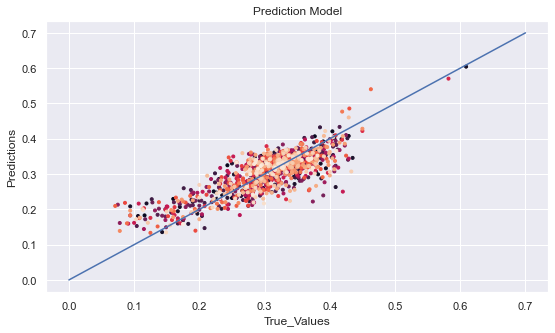

In [29]:
#predict on unseen data (Ridge)
sz = 9;
c = np.linspace(5,10,len(y_test));
plt.figure(figsize=(9,5))
plt.scatter(y_test, pred_test_lr_poly,sz,c,marker='o')
plt.xlabel('True_Values')
plt.ylabel('Predictions')
plt.title('Prediction Model')
plt.plot(np.linspace(0,.7,50), np.linspace(0,.7,50))i
plt.savefig('Prediction Model-Ridge.png', dpi=400)

In [30]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200) #alphavec: all the alphas to try 

#IMPT HERE
lr_model_ridge = RidgeCV(alphas = alphavec, cv=5) #CV = folds, so this model will try 200 alphas in each fold -> try 1000 alphas at one go
lr_model_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [31]:
lr_model_ridge.alpha_


0.01

In [32]:
#retrain model with best alpha (RIDGE)
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)
print('RIDGE - TRAIN+VALIDATED MODEL')
print('R^2: ', r2_score(y_train, pred_train_rr))
print('MAE: ', np.mean(np.abs(y_train - pred_train_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_train,pred_train_rr))) #Root Mean Squared Error (RMSE)

pred_test_rr= rr.predict(X_test)
print('\nRIDGE - TEST RESULT')
print('R^2: ', r2_score(y_test, pred_test_rr))
print('MAE: ', np.mean(np.abs(y_test - pred_test_rr)))
print('RSME: ', np.sqrt(mean_squared_error(y_test,pred_test_rr))) #Root Mean Squared Error (RMSE)

RIDGE - TRAIN+VALIDATED MODEL
R^2:  0.509828410278852
MAE:  OBP    0.036004
dtype: float64
RSME:  0.04761422521939433

RIDGE - TEST RESULT
R^2:  0.5008081986278037
MAE:  OBP    0.035886
dtype: float64
RSME:  0.04673198065109028


In [36]:
#Assumption 1:regression is linear in parameters and correctly specified

def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y)
#     plt.plot(y, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot") #quantile to quantile plot

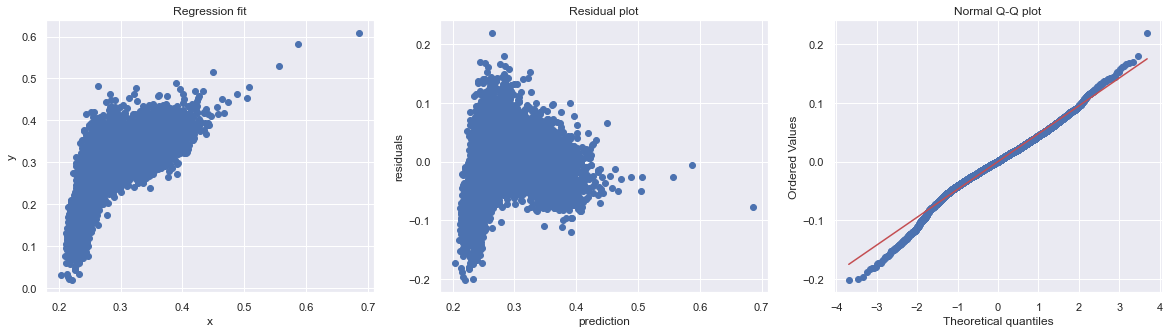

In [35]:
import scipy.stats as stats

x=sample.drop(['OBP'],axis=1)
y=sample['OBP']

diagnostic_plot (x, y)